In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
from  tkinter import *
from tkinter import filedialog
import mymodules_ as mm
from astropy.stats import sigma_clip

Open the image

In [2]:
[filePath, DirPath] = mm.openFileDia("D:/Python/Data/", "*.tif")
# DirPath = filePath[0:-1*len(filePath.split('/')[-1])]


In [3]:
[Ref_filePath, Ref_dirPath] = mm.openFileDia("D:/Python/Data/", "*.png")

In [4]:
numberOfIm = 150
imArray=np.zeros((512,640,numberOfIm),dtype=np.int16)
imVectorArray = np.zeros((512*640,numberOfIm),dtype=np.double)
for i in range(1, numberOfIm+1):
    filename = filename = DirPath+'image'+("%0.5o"% (i))+'.tiff.tif'
    #print(filename)
    imArray[:,:,i-1] = cv2.imread(filename,-1)
    imVectorArray[:,i-1]  = cv2.imread(filename,-1).reshape(512*640)
    cv2.imshow('image',imArray[:,:,i-1])
    cv2.waitKey(10)
#     cv2.destroyAllWindows()
#     print(i)
    if i==numberOfIm:
        print('images are loaded: i='+str(i))
        cv2.destroyAllWindows()
    
   


images are loaded: i=150


In [5]:
px_mean=imVectorArray.mean(axis=1)
px_sd=imVectorArray.std(axis=1)
print('Menan: '+str(px_mean.mean()))
print('SD_mean: '+str(px_sd.mean()))

Menan: 16395.8268205
SD_mean: 137.06118441


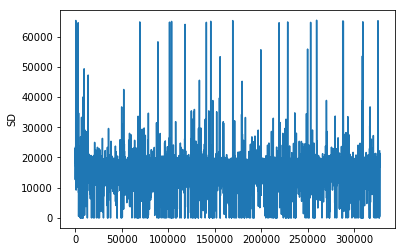

In [6]:
plt.plot(px_mean)
plt.ylabel('SD')
plt.show()

Find the pixels with too high and too low sd

In [19]:
MenanSDs = px_sd.mean()
SDofSDs = px_sd.std()
MenanOfMeans = px_mean.mean()
SDofMeans = px_mean.std()
sigma=3
sigma2 = 3
absMinRange = np.array([0,MenanOfMeans-sigma2*SDofMeans])
absMaxRange = np.array([MenanOfMeans+sigma2*SDofMeans,px_mean.max()])
WrongGroup1 = np.where(px_sd<=MenanSDs-sigma*SDofSDs)
WrongGroup2 = np.where(px_sd>=MenanSDs+sigma*SDofSDs)
WrongGroup3 = np.where(px_mean<=absMinRange[1])
WrongGroup4 = np.where(px_mean>=absMaxRange[0])

BadPixMap=np.zeros(512*640,np.uint8)
BadPixMap[WrongGroup1]=255
BadPixMap[WrongGroup2]=255
BadPixMap[WrongGroup3]=255
BadPixMap[WrongGroup4]=255
BadPixMap = BadPixMap.reshape(512,640)

In [20]:
absMaxRange

array([ 19538.63960467,  65396.73333333])

In [21]:
mm.showImageCV(BadPixMap)


In [22]:
# plt.plot(BadPixMap[:], '.')
# plt.ylabel('badPix')
# plt.show()

In [23]:
imR = cv2.imread(Ref_filePath,-1)
rot_imR = np.rot90(imR,3)

In [24]:
diffIM = rot_imR-BadPixMap
z=True
while z:
    cv2.imshow('image',BadPixMap)
    k = cv2.waitKey(50)
    cv2.imshow('image',rot_imR)
    k = cv2.waitKey(100)
    if k==27:
        z=False
        cv2.destroyAllWindows()

# mm.showImageCV(diffIM)

In [23]:
np.array([1,100])[1]

100